## Load Dataset

In [1]:
from image_datasets.IXIdataset import IXIDataset

root = "/lustre/fswork/projects/rech/krk/usy14zi/datasets/IXI-dataset/size64/"
dataset_train = IXIDataset(root, mode="train")

channels, image_size, _ = dataset_train[0]['T1'].shape
print(f"Image of size {image_size}, with {channels} channel(s).")

Image of size 64, with 1 channel(s).


In [2]:
from torch.utils.data import DataLoader

batch_size = 20

train_loader = DataLoader(
    dataset_train,
    batch_size=batch_size,
    shuffle=False,
)

## Initialize diffusion model

In [3]:
from diffusion.time_scheduler import quadratic_beta_schedule

timesteps = 600
betas = quadratic_beta_schedule(timesteps, beta_start=0.00001, beta_end=0.01)

In [4]:
import torch 
from model.unet import Unet

device = "cuda" if torch.cuda.is_available() else "cpu"

model = Unet(
    dim=image_size,
    channels=channels,
    dim_mults=(1, 2, 4,)
)
model.to(device)
print(sum(p.numel() for p in model.parameters() if p.requires_grad))

9893889


In [5]:
from diffusion.diffusion import DiffusionModel

ddpm = DiffusionModel(model, timesteps, betas, device, loss_type='huber')

## Train the model

In [6]:
from torch.optim import Adam

epochs = 100
optimizer = Adam(model.parameters(), lr=3e-4)

In [7]:
ddpm.train(epochs, optimizer, train_loader)

Epoch 0: 100%|##########| 24/24 [00:16<00:00,  1.44it/s]


Loss: 0.26335539606710273


Epoch 1: 100%|##########| 24/24 [00:02<00:00,  9.08it/s]


Loss: 0.1514306760703524


Epoch 2: 100%|##########| 24/24 [00:02<00:00,  8.97it/s]


Loss: 0.1395050147548318


Epoch 3: 100%|##########| 24/24 [00:02<00:00,  8.88it/s]


Loss: 0.09748428827151656


Epoch 4: 100%|##########| 24/24 [00:02<00:00,  8.63it/s]


Loss: 0.09837859713782866


Epoch 5: 100%|##########| 24/24 [00:02<00:00,  8.80it/s]


Loss: 0.07991566400354107


Epoch 6: 100%|##########| 24/24 [00:02<00:00,  9.00it/s]


Loss: 0.08860788168385625


Epoch 7: 100%|##########| 24/24 [00:02<00:00,  9.01it/s]


Loss: 0.07108346128370613


Epoch 8: 100%|##########| 24/24 [00:02<00:00,  9.09it/s]


Loss: 0.07579605933278799


Epoch 9: 100%|##########| 24/24 [00:02<00:00,  9.01it/s]


Loss: 0.06963230793674786


Epoch 10: 100%|##########| 24/24 [00:02<00:00,  8.78it/s]


Loss: 0.05878501765740415


Epoch 11: 100%|##########| 24/24 [00:02<00:00,  9.06it/s]


Loss: 0.07293379167094827


Epoch 12: 100%|##########| 24/24 [00:02<00:00,  9.12it/s]


Loss: 0.06931540773560603


Epoch 13: 100%|##########| 24/24 [00:02<00:00,  9.05it/s]


Loss: 0.06701679077620308


Epoch 14: 100%|##########| 24/24 [00:02<00:00,  9.05it/s]


Loss: 0.057275958359241486


Epoch 15: 100%|##########| 24/24 [00:02<00:00,  9.11it/s]


Loss: 0.055439845037957035


Epoch 16: 100%|##########| 24/24 [00:02<00:00,  8.76it/s]


Loss: 0.05555285606533289


Epoch 17: 100%|##########| 24/24 [00:02<00:00,  9.07it/s]


Loss: 0.05847594700753689


Epoch 18: 100%|##########| 24/24 [00:02<00:00,  9.04it/s]


Loss: 0.0572640432510525


Epoch 19: 100%|##########| 24/24 [00:02<00:00,  9.05it/s]


Loss: 0.0579977942785869


Epoch 20: 100%|##########| 24/24 [00:02<00:00,  9.02it/s]


Loss: 0.05112757673487067


Epoch 21: 100%|##########| 24/24 [00:02<00:00,  9.07it/s]


Loss: 0.05454385303892195


Epoch 22: 100%|##########| 24/24 [00:02<00:00,  8.77it/s]


Loss: 0.05885706593592962


Epoch 23: 100%|##########| 24/24 [00:02<00:00,  9.04it/s]


Loss: 0.05347730157275995


Epoch 24: 100%|##########| 24/24 [00:02<00:00,  9.11it/s]


Loss: 0.04984567054392149


Epoch 25: 100%|##########| 24/24 [00:02<00:00,  9.05it/s]


Loss: 0.046816474913309016


Epoch 26: 100%|##########| 24/24 [00:02<00:00,  9.08it/s]


Loss: 0.05358368274755776


Epoch 27: 100%|##########| 24/24 [00:02<00:00,  8.64it/s]


Loss: 0.045980346001063786


Epoch 28: 100%|##########| 24/24 [00:02<00:00,  8.88it/s]


Loss: 0.05400161802147826


Epoch 29: 100%|##########| 24/24 [00:02<00:00,  8.98it/s]


Loss: 0.05055405253854891


Epoch 30: 100%|##########| 24/24 [00:02<00:00,  9.01it/s]


Loss: 0.049494849905992545


Epoch 31: 100%|##########| 24/24 [00:02<00:00,  8.79it/s]


Loss: 0.053893935323382415


Epoch 32: 100%|##########| 24/24 [00:02<00:00,  8.83it/s]


Loss: 0.04486299018996457


Epoch 33: 100%|##########| 24/24 [00:02<00:00,  8.75it/s]


Loss: 0.051814543238530554


Epoch 34: 100%|##########| 24/24 [00:02<00:00,  9.01it/s]


Loss: 0.041467642333979406


Epoch 35: 100%|##########| 24/24 [00:02<00:00,  8.95it/s]


Loss: 0.04301772666318963


Epoch 36: 100%|##########| 24/24 [00:02<00:00,  8.81it/s]


Loss: 0.04602692097735902


Epoch 37: 100%|##########| 24/24 [00:02<00:00,  8.91it/s]


Loss: 0.05914818844757974


Epoch 38: 100%|##########| 24/24 [00:02<00:00,  9.05it/s]


Loss: 0.047924793868636094


Epoch 39: 100%|##########| 24/24 [00:02<00:00,  8.68it/s]


Loss: 0.051363689824938774


Epoch 40: 100%|##########| 24/24 [00:02<00:00,  8.90it/s]


Loss: 0.04790334690672656


Epoch 41: 100%|##########| 24/24 [00:02<00:00,  8.98it/s]


Loss: 0.0446719437216719


Epoch 42: 100%|##########| 24/24 [00:02<00:00,  8.92it/s]


Loss: 0.04261072616403302


Epoch 43: 100%|##########| 24/24 [00:02<00:00,  8.88it/s]


Loss: 0.04103225492872298


Epoch 44: 100%|##########| 24/24 [00:02<00:00,  8.96it/s]


Loss: 0.04239091486670077


Epoch 45: 100%|##########| 24/24 [00:02<00:00,  8.70it/s]


Loss: 0.042117086316769324


Epoch 46: 100%|##########| 24/24 [00:02<00:00,  8.88it/s]


Loss: 0.05170312368621429


Epoch 47: 100%|##########| 24/24 [00:02<00:00,  8.99it/s]


Loss: 0.05236154874243463


Epoch 48: 100%|##########| 24/24 [00:02<00:00,  9.07it/s]


Loss: 0.04448517031657199


Epoch 49: 100%|##########| 24/24 [00:02<00:00,  8.83it/s]


Loss: 0.04455892772724231


Epoch 50: 100%|##########| 24/24 [00:02<00:00,  9.06it/s]


Loss: 0.04492460602583984


Epoch 51: 100%|##########| 24/24 [00:02<00:00,  8.72it/s]


Loss: 0.04012082749977708


Epoch 52: 100%|##########| 24/24 [00:02<00:00,  9.04it/s]


Loss: 0.04485926443400482


Epoch 53: 100%|##########| 24/24 [00:02<00:00,  8.99it/s]


Loss: 0.04336631492090722


Epoch 54: 100%|##########| 24/24 [00:02<00:00,  8.96it/s]


Loss: 0.043444462198143206


Epoch 55: 100%|##########| 24/24 [00:02<00:00,  8.97it/s]


Loss: 0.04229633750704428


Epoch 56: 100%|##########| 24/24 [00:02<00:00,  8.54it/s]


Loss: 0.043157022524004184


Epoch 57: 100%|##########| 24/24 [00:02<00:00,  8.92it/s]


Loss: 0.045321841180945434


Epoch 58: 100%|##########| 24/24 [00:02<00:00,  8.94it/s]


Loss: 0.040929259809975825


Epoch 59: 100%|##########| 24/24 [00:02<00:00,  8.75it/s]


Loss: 0.039863090651730694


Epoch 60: 100%|##########| 24/24 [00:02<00:00,  8.79it/s]


Loss: 0.04348181537352502


Epoch 61: 100%|##########| 24/24 [00:02<00:00,  8.98it/s]


Loss: 0.04104804511492451


Epoch 62: 100%|##########| 24/24 [00:02<00:00,  8.29it/s]


Loss: 0.04647991294041276


Epoch 63: 100%|##########| 24/24 [00:02<00:00,  8.89it/s]


Loss: 0.039778358031374715


Epoch 64: 100%|##########| 24/24 [00:02<00:00,  8.99it/s]


Loss: 0.04394605701478819


Epoch 65: 100%|##########| 24/24 [00:02<00:00,  8.96it/s]


Loss: 0.052141232416033745


Epoch 66: 100%|##########| 24/24 [00:02<00:00,  8.93it/s]


Loss: 0.038959491124842316


Epoch 67: 100%|##########| 24/24 [00:02<00:00,  8.89it/s]


Loss: 0.042829676220814385


Epoch 68: 100%|##########| 24/24 [00:02<00:00,  8.72it/s]


Loss: 0.04241085611283779


Epoch 69: 100%|##########| 24/24 [00:02<00:00,  8.89it/s]


Loss: 0.03996221177900831


Epoch 70: 100%|##########| 24/24 [00:02<00:00,  8.90it/s]


Loss: 0.034120536874979734


Epoch 71: 100%|##########| 24/24 [00:02<00:00,  8.86it/s]


Loss: 0.04067891463637352


Epoch 72: 100%|##########| 24/24 [00:02<00:00,  8.86it/s]


Loss: 0.038064751851682864


Epoch 73: 100%|##########| 24/24 [00:02<00:00,  8.82it/s]


Loss: 0.035573110450059175


Epoch 74: 100%|##########| 24/24 [00:02<00:00,  8.49it/s]


Loss: 0.03627786040306091


Epoch 75: 100%|##########| 24/24 [00:02<00:00,  8.79it/s]


Loss: 0.03760464295434455


Epoch 76: 100%|##########| 24/24 [00:02<00:00,  8.80it/s]


Loss: 0.04054842020074526


Epoch 77: 100%|##########| 24/24 [00:02<00:00,  8.84it/s]


Loss: 0.037250334241737924


Epoch 78: 100%|##########| 24/24 [00:02<00:00,  8.89it/s]


Loss: 0.03933466823461155


Epoch 79: 100%|##########| 24/24 [00:02<00:00,  8.56it/s]


Loss: 0.03900660285338139


Epoch 80: 100%|##########| 24/24 [00:02<00:00,  8.84it/s]


Loss: 0.03461066928381721


Epoch 81: 100%|##########| 24/24 [00:02<00:00,  9.04it/s]


Loss: 0.04716076965754231


Epoch 82: 100%|##########| 24/24 [00:02<00:00,  8.73it/s]


Loss: 0.03835650747835947


Epoch 83: 100%|##########| 24/24 [00:02<00:00,  8.96it/s]


Loss: 0.035126378604521356


Epoch 84: 100%|##########| 24/24 [00:02<00:00,  8.90it/s]


Loss: 0.03677303255729688


Epoch 85: 100%|##########| 24/24 [00:02<00:00,  8.58it/s]


Loss: 0.03798239662622412


Epoch 86: 100%|##########| 24/24 [00:02<00:00,  9.02it/s]


Loss: 0.04205656152529021


Epoch 87: 100%|##########| 24/24 [00:02<00:00,  8.90it/s]


Loss: 0.03799844044260681


Epoch 88: 100%|##########| 24/24 [00:02<00:00,  8.96it/s]


Loss: 0.03483635474306842


Epoch 89: 100%|##########| 24/24 [00:02<00:00,  8.94it/s]


Loss: 0.03659354577151438


Epoch 90: 100%|##########| 24/24 [00:02<00:00,  9.02it/s]


Loss: 0.03568152943626046


Epoch 91: 100%|##########| 24/24 [00:02<00:00,  8.76it/s]


Loss: 0.04236175546733042


Epoch 92: 100%|##########| 24/24 [00:02<00:00,  9.03it/s]


Loss: 0.041871146531775594


Epoch 93: 100%|##########| 24/24 [00:02<00:00,  9.00it/s]


Loss: 0.04293449207519492


Epoch 94: 100%|##########| 24/24 [00:02<00:00,  9.01it/s]


Loss: 0.037253545868831374


Epoch 95: 100%|##########| 24/24 [00:02<00:00,  9.04it/s]


Loss: 0.04180428265438726


Epoch 96: 100%|##########| 24/24 [00:02<00:00,  9.01it/s]


Loss: 0.03580374883798262


Epoch 97: 100%|##########| 24/24 [00:02<00:00,  8.73it/s]


Loss: 0.03827501539490186


Epoch 98: 100%|##########| 24/24 [00:02<00:00,  8.98it/s]


Loss: 0.03678374753023187


Epoch 99: 100%|##########| 24/24 [00:02<00:00,  9.07it/s]


Loss: 0.03900733566842973


## Sample

600


sampling loop time step: 100%|##########| 600/600 [00:47<00:00, 12.69it/s]


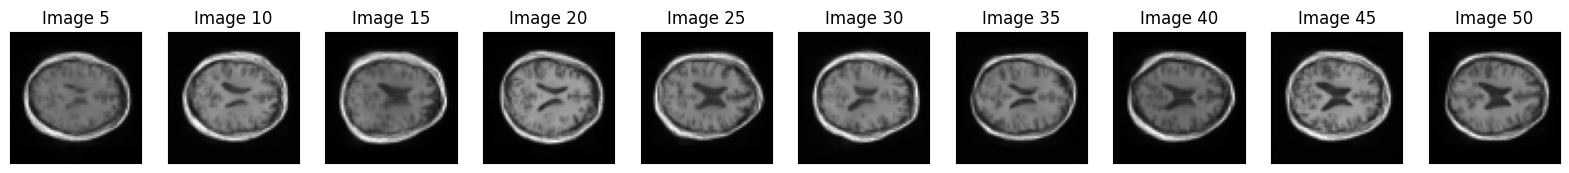

In [8]:
from diffusion.sampler import sample
import matplotlib.pyplot as plt

# sample 64 images
samples = sample(ddpm, image_size=image_size, batch_size=64, channels=channels)

# show a random one
random_indexes = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

fig, axs = plt.subplots(1, 10, figsize=(20, 8))
for i in range(10):
    idx = random_indexes[i]
    axs[i].get_xaxis().set_visible(False)
    axs[i].get_yaxis().set_visible(False)
    axs[i].set_title(f"Image {idx}")
    axs[i].imshow(samples[-1][idx].reshape(image_size, image_size, channels), cmap="gray")
plt.show()

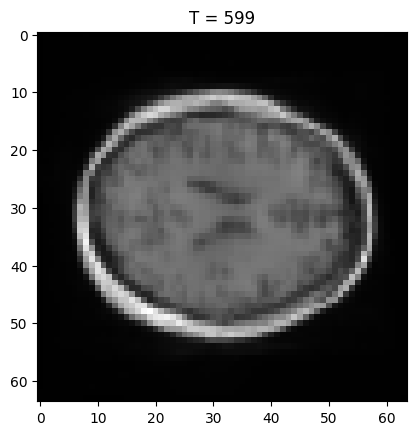

In [9]:
import matplotlib.animation as animation

random_index = 5

fig = plt.figure()
ims = []
for i in range(timesteps):
    plt.title(f"T = {i}")
    im = plt.imshow(samples[i][random_index].reshape(image_size, image_size, channels), cmap="gray", animated=True)
    ims.append([im])

animate = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
animate.save('diffusion64x64.gif')
plt.show()